Data Understanding

In [276]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [277]:
df = pd.read_csv('Supplement_Sales_Weekly_Expanded.csv')

In [278]:
df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            5 non-null      object 
 1   Product Name    5 non-null      object 
 2   Category        5 non-null      object 
 3   Units Sold      5 non-null      int64  
 4   Price           5 non-null      float64
 5   Revenue         5 non-null      float64
 6   Discount        5 non-null      float64
 7   Units Returned  5 non-null      int64  
 8   Location        5 non-null      object 
 9   Platform        5 non-null      object 
dtypes: float64(3), int64(2), object(5)
memory usage: 532.0+ bytes


In [279]:
df.describe()

,Units Sold,Price,Revenue,Discount,Units Returned
count,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,150.200274,34.781229,5226.569446,0.124398,1.531478
std,12.396099,14.198309,2192.491946,0.071792,1.258479
min,103.000000,10.000000,1284.000000,0.000000,0.000000
25%,142.000000,22.597500,3349.372500,0.060000,1.000000
50%,150.000000,34.720000,5173.140000,0.120000,1.000000
75%,158.000000,46.712500,7009.960000,0.190000,2.000000
max,194.000000,59.970000,10761.850000,0.250000,8.000000


Data preparation

1. Data Cleaning

In [280]:
df.duplicated().sum()

0

In [281]:
df.isnull().sum()

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

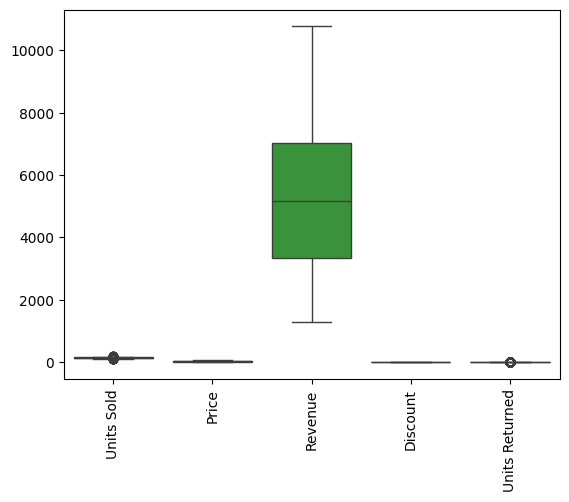

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(df)

sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

**2. Missing value**

In [283]:
df.notnull()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
4379,True,True,True,True,True,True,True,True,True,True
4380,True,True,True,True,True,True,True,True,True,True
4381,True,True,True,True,True,True,True,True,True,True
4382,True,True,True,True,True,True,True,True,True,True


In [284]:
missing = df.isnull().sum()
missing = missing[missing > 0]
print("Kolom dengan missing values:\n", missing)

Kolom dengan missing values:
 Series([], dtype: int64)


3. Outlier

In [285]:
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])
    return df

In [286]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df = handle_outliers(df, numeric_cols)
print (df)

            Date        Product Name     Category  Units Sold  Price  Revenue  \
0     2020-01-06        Whey Protein      Protein       143.0  31.98  4573.14   
1     2020-01-06           Vitamin C      Vitamin       139.0  42.51  5908.89   
2     2020-01-06            Fish Oil        Omega       161.0  12.91  2078.51   
3     2020-01-06        Multivitamin      Vitamin       140.0  16.07  2249.80   
4     2020-01-06         Pre-Workout  Performance       157.0  35.47  5568.79   
...          ...                 ...          ...         ...    ...      ...   
4379  2025-03-31           Melatonin    Sleep Aid       160.0  47.79  7646.40   
4380  2025-03-31              Biotin      Vitamin       154.0  38.12  5870.48   
4381  2025-03-31   Green Tea Extract   Fat Burner       139.0  20.40  2835.60   
4382  2025-03-31     Iron Supplement      Mineral       154.0  18.31  2819.74   
4383  2025-03-31  Electrolyte Powder    Hydration       178.0  39.12  6963.36   

      Discount  Units Retur

4. Transformasi data

In [287]:
from sklearn.preprocessing import LabelEncoder

le_location = LabelEncoder()
le_category = LabelEncoder()

df['Location_encoded'] = le_location.fit_transform(df['Location'])
df['Category_encoded'] = le_category.fit_transform(df['Category'])

print(df['Location_encoded'])
print(df['Category_encoded'])

0       0
1       1
2       0
3       0
4       0
       ..
4379    2
4380    1
4381    2
4382    0
4383    1
Name: Location_encoded, Length: 4384, dtype: int32
0       7
1       9
2       5
3       9
4       6
       ..
4379    8
4380    9
4381    1
4382    4
4383    3
Name: Category_encoded, Length: 4384, dtype: int32


In [288]:
from sklearn.preprocessing import StandardScaler

In [289]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols])

In [290]:
df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols)
print (df_scaled)

      Units Sold     Price   Revenue  Discount  Units Returned
0      -0.584786 -0.197316 -0.298064 -1.315034        0.483238
1      -0.910129  0.544407  0.311243 -1.175727       -1.325142
2       0.879257 -1.540587 -1.436000  1.749735       -1.325142
3      -0.828793 -1.318000 -1.357865 -0.618496       -1.325142
4       0.553914  0.048516  0.156105  1.749735        1.387429
...          ...       ...       ...       ...             ...
4379    0.797921  0.916324  1.103815  1.192504       -0.420952
4380    0.309907  0.235180  0.293722  1.331812       -0.420952
4381   -0.910129 -1.012999 -1.090650 -0.061265        1.387429
4382    0.309907 -1.160216 -1.097885  1.471120        0.483238
4383    2.261964  0.305618  0.792244  1.471120       -1.325142

[4384 rows x 5 columns]


5. Seleksi Fitur

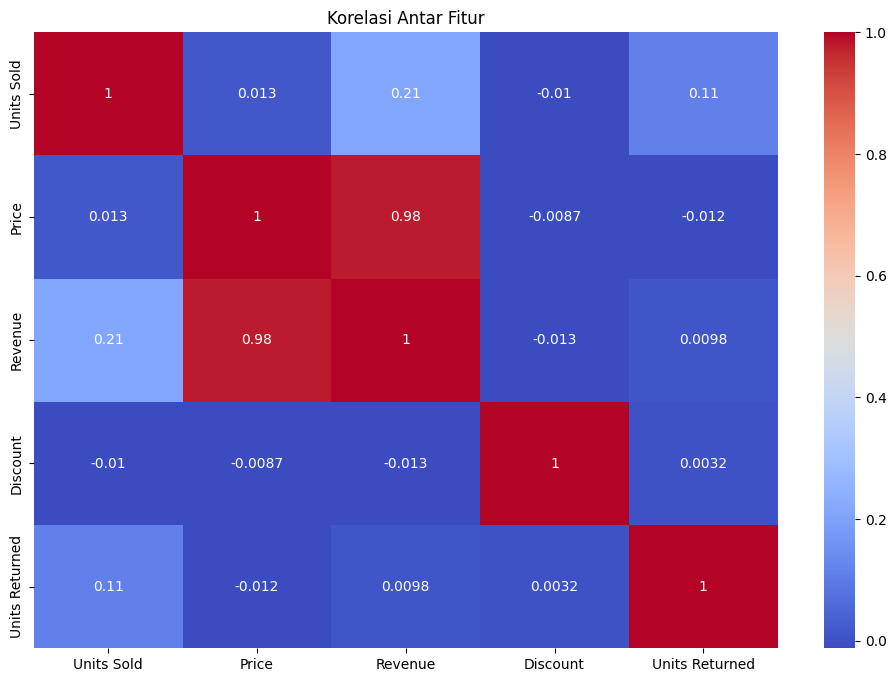

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()


<h1><b>Data Modeling</b></h1>

<h3>1. Naive Bayes</h3>

<h5>Data Balancing<h5>

In [292]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [293]:
print(df['Location'].value_counts())
print(df['Location'].value_counts(normalize=True))

Location
Canada    1507
UK        1475
USA       1402
Name: count, dtype: int64
Location
Canada    0.343750
UK        0.336451
USA       0.319799
Name: proportion, dtype: float64


In [294]:
le_location = LabelEncoder()
le_category = LabelEncoder()

X = le_location.fit_transform(df['Category']).reshape(-1, 1)
y = le_category.fit_transform(df['Location'])

print(X)
print(y)

[[7]
 [9]
 [5]
 ...
 [1]
 [4]
 [3]]
[0 1 0 ... 2 0 1]


In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [296]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [297]:
y_pred = model.predict(X_test)

In [298]:
print("accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.30444697833523376


In [299]:
print("confusion matrix:", confusion_matrix(y_test, y_pred))

confusion matrix: [[  0 300   0]
 [  0 267   0]
 [  0 310   0]]


In [300]:
print("classification report:", classification_report(y_test, y_pred, target_names=le_category.classes_))

classification report:               precision    recall  f1-score   support

      Canada       0.00      0.00      0.00       300
          UK       0.30      1.00      0.47       267
         USA       0.00      0.00      0.00       310

    accuracy                           0.30       877
   macro avg       0.10      0.33      0.16       877
weighted avg       0.09      0.30      0.14       877



c:\Users\firma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\firma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\firma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [301]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

In [302]:
pred_proba = model.predict_proba(X_test)

In [303]:
n_classes = len(model.classes_)
y_test_bin = label_binarize(y_test, classes=model.classes_)

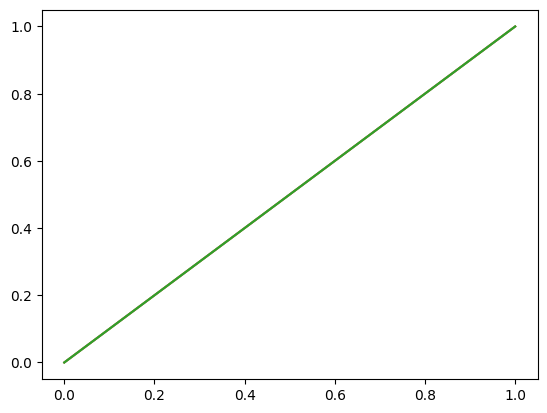

In [304]:
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{le_location.inverse_transform([model.classes_[i]])[0]} (AUC = {roc_auc:.2f})')

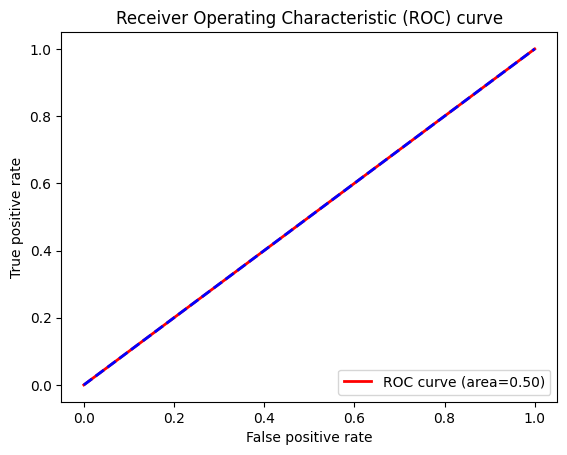

In [305]:
plt.Figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area=%0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='lower right')
plt.show()

<h3>Clustering – KMeans</h3>

In [306]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [307]:
df[['Product Name','Units Sold']]

,Product Name,Units Sold
0,Whey Protein,143.0
1,Vitamin C,139.0
2,Fish Oil,161.0
3,Multivitamin,140.0
4,Pre-Workout,157.0
...,...,...
4379,Melatonin,160.0
4380,Biotin,154.0
4381,Green Tea Extract,139.0
4382,Iron Supplement,154.0


In [308]:
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,Location_encoded,Category_encoded
0,2020-01-06,Whey Protein,Protein,143.0,31.98,4573.14,0.03,2.0,Canada,Walmart,0,7
1,2020-01-06,Vitamin C,Vitamin,139.0,42.51,5908.89,0.04,0.0,UK,Amazon,1,9
2,2020-01-06,Fish Oil,Omega,161.0,12.91,2078.51,0.25,0.0,Canada,Amazon,0,5
3,2020-01-06,Multivitamin,Vitamin,140.0,16.07,2249.80,0.08,0.0,Canada,Walmart,0,9
4,2020-01-06,Pre-Workout,Performance,157.0,35.47,5568.79,0.25,3.0,Canada,iHerb,0,6


In [309]:
u = df.groupby("Product Name")["Units Sold"].mean().reset_index()

In [310]:
scaler = StandardScaler()
X = scaler.fit_transform(u[["Units Sold"]])

In [311]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

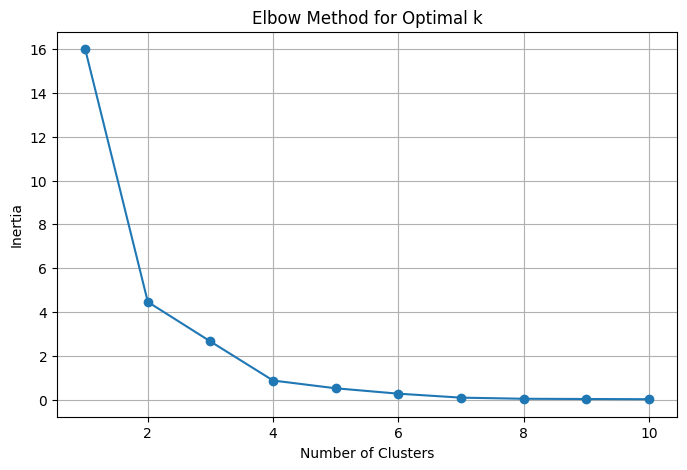

In [312]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [313]:
model = KMeans(n_clusters=3, random_state=42)
u["Cluster"] = model.fit_predict(X)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [314]:
df = df.merge(u[["Product Name", "Cluster"]], on="Product Name", how="left")

In [315]:
from sklearn.decomposition import PCA

# Ambil kolom numerik saja
numerical_cols = df.select_dtypes(include='number').drop(columns='Cluster')

# Jalankan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_cols)

# Tambahkan hasil PCA ke df
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]


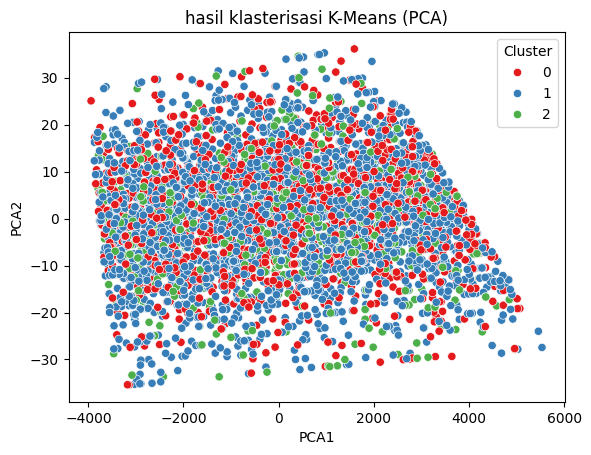

In [316]:
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set1')
plt.title('hasil klasterisasi K-Means (PCA)')
plt.show()

In [317]:
kmeans_final = KMeans(n_clusters=3, random_state=42)
u["Cluster"] = kmeans_final.fit_predict(X)

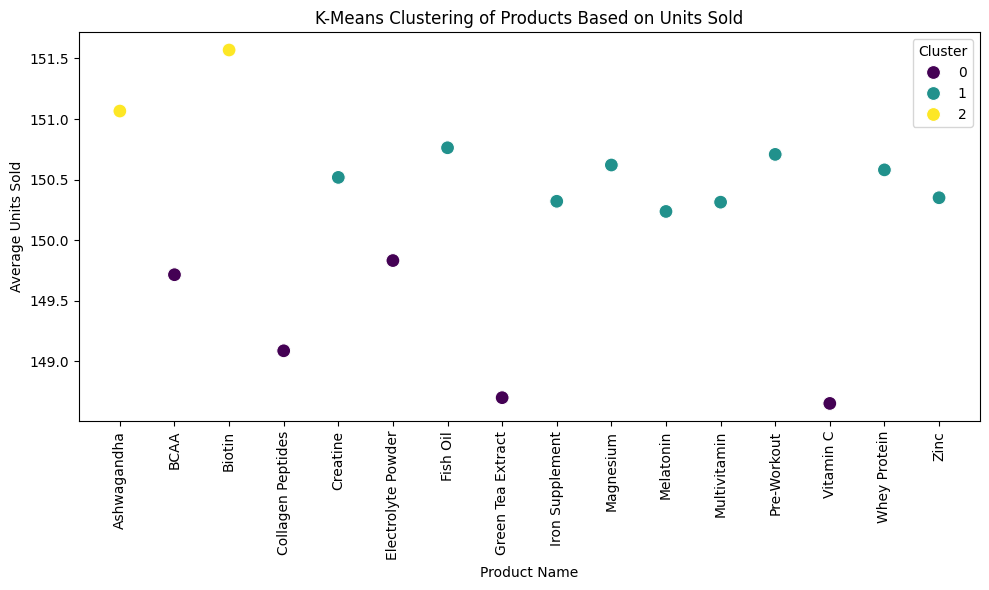

In [318]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=u, x="Product Name", y="Units Sold", hue="Cluster", palette="viridis", s=100)
plt.xticks(rotation=90)
plt.title("K-Means Clustering of Products Based on Units Sold")
plt.xlabel("Product Name")
plt.ylabel("Average Units Sold")
plt.tight_layout()
plt.show()

In [319]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X_clust = df[['Units Sold', 'Revenue', 'Discount', 'Units Returned']]
scaler = StandardScaler()
X_clust_scaled = scaler.fit_transform(X_clust)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_clust_scaled)

df['Cluster'] = clusters  # opsional, jika ingin dianalisis lebih lanjut


<h1><b>Evaluation</b></h1>

In [320]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, root_mean_squared_error, silhouette_score

<h1><b>Deploymen</b></h1>

In [270]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load ulang data jika belum ada
df = pd.read_csv("Supplement_Sales_Weekly_Expanded.csv")

# Encode kolom kategorikal
df_encoded = df.copy()
le_category = LabelEncoder()
le_platform = LabelEncoder()
le_location = LabelEncoder()

df_encoded["Category_encoded"] = le_category.fit_transform(df_encoded["Category"])
df_encoded["Platform_encoded"] = le_platform.fit_transform(df_encoded["Platform"])
df_encoded["Location_encoded"] = le_location.fit_transform(df_encoded["Location"])


In [271]:
# X seharusnya mencakup semua fitur yang ingin kamu gunakan untuk prediksi
X = df_encoded[["Category_encoded", "Units Sold", "Price", "Revenue", "Discount", "Platform_encoded"]]

# y adalah label yang ingin kamu prediksi
y = df_encoded["Location_encoded"]

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tidak perlu tentukan ulang feature_names karena X sudah punya nama kolom
df_results = X_test.copy()
df_results["Actual_Location"] = y_test.values
df_results["Predicted_Location"] = y_pred

# Mapping label menjadi nama lokasi
label_map = {0: "Canada", 1: "UK", 2: "USA"}
df_results["Actual_Location"] = df_results["Actual_Location"].map(label_map)
df_results["Predicted_Location"] = df_results["Predicted_Location"].map(label_map)

# Simpan ke CSV
df_results.to_csv("predicted_location.csv", index=False)



In [321]:
import json
from sklearn.metrics import classification_report

# Hasil evaluasi
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Simpan ke file JSON
with open("classification_metrics.json", "w") as f:
    json.dump(report_dict, f, indent=4)


c:\Users\firma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\firma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\firma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [322]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("Supplement_Sales_Weekly_Expanded.csv")

# Fitur numerik untuk clustering
features = ['Units Sold', 'Price', 'Revenue', 'Discount', 'Units Returned']
X = df[features]

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Simpan ke CSV
df.to_csv("clustered_data.csv", index=False)
print("clustered_data.csv berhasil disimpan.")


clustered_data.csv berhasil disimpan.


In [272]:
import joblib

# Simpan model
joblib.dump(model, "naive_bayes_model.pkl")

# Untuk load kembali
model = joblib.load("naive_bayes_model.pkl")


<h1><b>Dashboard</b></h1>

In [273]:
!ngrok config add-authtoken2wwOqm1pIwlyM7XfNg4SncsvaO9_6MNkWqKdUWCZSV9NWmmv

NAME:
  config - update or migrate ngrok's configuration file

USAGE:
  ngrok config [flags]

DESCRIPTION: 
  The config command gives a quick way to create or update ngrok's configuration
  file. Use 'add-authtoken' or 'add-api-key' to set the corresponding properties.

  Use 'check' to test a configuration file for validity. If you have an old
  configuration file, you can also use 'upgrade' to automatically migrate to the
  latest version.

COMMANDS:
  add-api-key                    save api key to configuration file
  add-authtoken                  save authtoken to configuration file
  add-connect-url                adds the connect URL (connect_url) to configuration file for custom agent ingress
  add-server-addr                alias of add-connect-url
  check                          check configuration file
  edit                           edit configuration file
  upgrade                        auto-upgrade configuration file

OPTIONS:
      --config strings   path to config f

In [325]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

st.set_page_config(page_title="Dashboard Analisis Penjualan Suplemen", layout="wide")
st.title("Dashboard Analisis Penjualan Suplemen")

@st.cache_data
def load_data():
    df = pd.read_csv("Supplement_Sales_Weekly_Expanded.csv")
    return df

def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])
    return df

@st.cache_data
def preprocess(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    df = handle_outliers(df, numeric_cols)

    le_location = LabelEncoder()
    le_category = LabelEncoder()

    df['Location_encoded'] = le_location.fit_transform(df['Location'])
    df['Category_encoded'] = le_category.fit_transform(df['Category'])

    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

    return df, df_scaled, le_location, le_category

@st.cache_data
def train_model(df):
    X = df['Category_encoded'].values.reshape(-1, 1)
    y = df['Location_encoded'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = MultinomialNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    return model, X_test, y_test, y_pred, y_proba

menu = st.sidebar.selectbox("Menu", ["Data Overview", "Model Evaluation", "Prediction Tool"])

df = load_data()
df_clean, df_scaled, le_location, le_category = preprocess(df)

if menu == "Data Overview":
    st.header("Data Overview")
    st.write("### Sample Data")
    st.dataframe(df.head())

    st.write("### Statistik Deskriptif")
    st.dataframe(df.describe())

    st.write("### Boxplot untuk Outlier")
    fig, ax = plt.subplots(figsize=(14, 6))
    sns.boxplot(data=df.select_dtypes(include=[np.number]), ax=ax)
    plt.xticks(rotation=90)
    st.pyplot(fig)

    st.write("### Korelasi antar fitur")
    fig2, ax2 = plt.subplots(figsize=(12, 8))
    sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', ax=ax2)
    st.pyplot(fig2)

elif menu == "Model Evaluation":
    st.header("Evaluasi Model Naive Bayes")
    model, X_test, y_test, y_pred, y_proba = train_model(df_clean)

    acc = accuracy_score(y_test, y_pred)
    st.metric("Akurasi", f"{acc:.3f}")

    st.write("### Confusion Matrix")
    fig_cm, ax_cm = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=ax_cm)
    ax_cm.set_xlabel("Predicted")
    ax_cm.set_ylabel("Actual")
    st.pyplot(fig_cm)

    st.write("### Classification Report")
    report = classification_report(y_test, y_pred, target_names=le_location.classes_, output_dict=True)
    st.dataframe(pd.DataFrame(report).transpose())

    st.write("### ROC Curve")
    n_classes = len(model.classes_)
    y_test_bin = label_binarize(y_test, classes=model.classes_)

    fig_roc, ax_roc = plt.subplots()
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc = auc(fpr, tpr)
        ax_roc.plot(fpr, tpr, label=f"{le_location.inverse_transform([model.classes_[i]])[0]} (AUC = {roc_auc:.2f})")
    ax_roc.plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax_roc.set_xlabel("False Positive Rate")
    ax_roc.set_ylabel("True Positive Rate")
    ax_roc.set_title("ROC Curve")
    ax_roc.legend()
    st.pyplot(fig_roc)

elif menu == "Prediction Tool":
    st.header("Tool Prediksi Lokasi Berdasarkan Kategori Produk")
    category_input = st.selectbox("Pilih Kategori Produk:", df['Category'].unique())

    input_enc = le_category.transform([category_input]).reshape(-1, 1)
    model, _, _, _, _ = train_model(df_clean)

    pred = model.predict(input_enc)[0]
    prob = model.predict_proba(input_enc)[0]

    pred_label = le_location.inverse_transform([pred])[0]

    st.write(f"### Prediksi Lokasi: **{pred_label}**")
    st.write(f"### Probabilitas Tiap Lokasi:")
    prob_df = pd.DataFrame({
        "Location": le_location.inverse_transform(model.classes_),
        "Probability": prob
    })
    st.dataframe(prob_df.sort_values(by="Probability", ascending=False))


Writing app.py


In [326]:
from pyngrok import ngrok
import threading
import time
import os

In [327]:
def run_streamlit():
    os.system("streamlit run attrition-app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8501)
print(f"Streamlit app is live at: {public_url}")


Streamlit app is live at: NgrokTunnel: "https://be98-36-65-251-8.ngrok-free.app" -> "http://localhost:8501"
